In [1]:
from os import path
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import math
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import estimators as ts_estimators
from tensorflow.contrib.timeseries.python.timeseries import model as ts_model
from train_lstm_multivariate import _LSTMModel

Instructions for updating:
Use the retry module or similar alternatives.


C:\Users\Nobody\Documents\Jupyter Notebook\KDD_Try\train_lstm_multivariate.py:28: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Nobody\Anaconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Nobody\Anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Nobody\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Nobody\Anaconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Nobody\Anaconda3\envs\tensorflow\lib\site-pac

# TimeStamp

In [3]:
# weather_done = pd.read_csv('weather_norm.csv').drop(['Unnamed: 0'],axis=1)

In [4]:
# weather_done['station_id'].value_counts()

xiayunling_meo     687
mentougou_meo      684
yanqing_meo        683
pingchang_meo      683
shijingshan_meo    683
zhaitang_meo       683
beijing_meo        683
huairou_meo        682
pinggu_meo         682
shunyi_meo         682
shangdianzi_meo    682
daxing_meo         681
chaoyang_meo       681
fangshan_meo       681
hadian_meo         680
fengtai_meo        680
tongzhou_meo       680
miyun_meo          677
Name: station_id, dtype: int64

In [5]:
# weather_station = weather_done.groupby('station_id')

In [6]:
# hadian_meo = weather_station.get_group('hadian_meo')

In [7]:
# hadian_meo.head()

,id,station_id,time,temperature,pressure,humidity,wind_speed,1.0,2.0,3.0,...,7.0,8.0,Cloudy,Hail,Light Rain,Overcast,Rain,Sleet,Sunny/clear,Thundershower
1,2050686,hadian_meo,2018-04-01 17:00:00,0.550000,0.590000,0.71,0.06250,0,1,0,...,0,0,0,1,0,0,0,0,0,0
19,2052219,hadian_meo,2018-04-01 18:00:00,0.568571,0.588182,0.64,0.08125,0,1,0,...,0,0,0,1,0,0,0,0,0,0
37,2053752,hadian_meo,2018-04-01 19:00:00,0.571429,0.587273,0.69,0.10625,0,1,0,...,0,0,0,1,0,0,0,0,0,0
55,2055285,hadian_meo,2018-04-01 20:00:00,0.550000,0.584545,0.77,0.06250,0,1,0,...,0,0,0,1,0,0,0,0,0,0
73,2056818,hadian_meo,2018-04-01 21:00:00,0.544286,0.586364,0.82,0.05625,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# weather_station = weather_done.groupby('station_id')
# hadian_meo = weather_station.get_group('hadian_meo')
# times = pd.date_range('2018-04-01 17:00:00', '2018-04-22 17:00:00', freq = 'H')
# hadian_meo.index = pd.DatetimeIndex(hadian_meo['time'])
# hadian_meo_time = hadian_meo.reindex(times)
# hadian_meo_time_ok = hadian_meo_time.interpolate()

In [ ]:
# hadian_meo_time_ok.head()

In [5]:
air_done = pd.read_csv('air_norm.csv').drop(['Unnamed: 0'],axis=1)

In [6]:
air_done['station_id'].value_counts()

yufa_aq              655
fengtaihuayuan_aq    655
dongsi_aq            655
qianmen_aq           655
nongzhanguan_aq      655
wanliu_aq            655
aotizhongxin_aq      655
fangshan_aq          655
xizhimenbei_aq       655
tiantan_aq           655
shunyi_aq            655
liulihe_aq           655
badaling_aq          655
huairou_aq           655
tongzhou_aq          655
yongdingmennei_aq    655
pingchang_aq         655
daxing_aq            655
yizhuang_aq          655
dongsihuan_aq        655
zhiwuyuan_aq         655
yongledian_aq        655
wanshouxigong_aq     655
yanqin_aq            655
dingling_aq          655
donggaocun_aq        655
miyun_aq             655
gucheng_aq           655
nansanhuan_aq        655
beibuxinqu_aq        655
miyunshuiku_aq       655
guanyuan_aq          655
mentougou_aq         655
pinggu_aq            655
yungang_aq           655
Name: station_id, dtype: int64

In [7]:
air_station = air_done.groupby('station_id')
input_aq = air_station.get_group('yongdingmennei_aq')
times = pd.date_range('2018-04-01 17:00:00', '2018-05-01 00:00:00', freq = 'H')
input_aq.index = pd.DatetimeIndex(input_aq['time'])
input_aq_time = input_aq.reindex(times)
input_aq_time_ok = input_aq_time.interpolate()

In [8]:
input_aq.head()

,id,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
time,,,,,,,,,
2018-04-01 17:00:00,2943189,yongdingmennei_aq,2018-04-01 17:00:00,0.133,0.051333,0.323333,0.060000,0.098,0.066667
2018-04-01 18:00:00,2943245,yongdingmennei_aq,2018-04-01 18:00:00,0.134,0.053667,0.330000,0.053333,0.044,0.050000
2018-04-01 19:00:00,2943301,yongdingmennei_aq,2018-04-01 19:00:00,0.134,0.051667,0.383333,0.066667,0.004,0.030000
2018-04-01 20:00:00,2943357,yongdingmennei_aq,2018-04-01 20:00:00,0.178,0.068333,0.390000,0.093333,0.016,0.023333
2018-04-01 21:00:00,2943413,yongdingmennei_aq,2018-04-01 21:00:00,0.248,0.086000,0.320000,0.106667,0.010,0.023333


In [9]:
input_aq_time_ok.head(15)

,id,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
2018-04-01 17:00:00,2943189.0,yongdingmennei_aq,2018-04-01 17:00:00,0.133,0.051333,0.323333,0.060000,0.098,0.066667
2018-04-01 18:00:00,2943245.0,yongdingmennei_aq,2018-04-01 18:00:00,0.134,0.053667,0.330000,0.053333,0.044,0.050000
2018-04-01 19:00:00,2943301.0,yongdingmennei_aq,2018-04-01 19:00:00,0.134,0.051667,0.383333,0.066667,0.004,0.030000
2018-04-01 20:00:00,2943357.0,yongdingmennei_aq,2018-04-01 20:00:00,0.178,0.068333,0.390000,0.093333,0.016,0.023333
2018-04-01 21:00:00,2943413.0,yongdingmennei_aq,2018-04-01 21:00:00,0.248,0.086000,0.320000,0.106667,0.010,0.023333
2018-04-01 22:00:00,2943469.0,yongdingmennei_aq,2018-04-01 22:00:00,0.257,0.108000,0.296667,0.126667,0.008,0.023333
2018-04-01 23:00:00,2943525.0,yongdingmennei_aq,2018-04-01 23:00:00,0.253,0.116500,0.293333,0.166667,0.006,0.023333
2018-04-02 00:00:00,2943563.0,NaN,NaN,0.263,0.110833,0.293333,0.170000,0.018,0.030000
2018-04-02 01:00:00,2943601.0,yongdingmennei_aq,2018-04-02 01:00:00,0.273,0.105167,0.293333,0.173333,0.030,0.036667
2018-04-02 02:00:00,2943657.0,yongdingmennei_aq,2018-04-02 02:00:00,0.300,0.111500,0.300000,0.160000,0.062,0.043333


In [589]:
input_aq_time_ok['time'].value_counts().value_counts()

1    655
Name: time, dtype: int64

# Model

In [590]:
from os import path
import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import estimators as ts_estimators
from tensorflow.contrib.timeseries.python.timeseries import model as ts_model
from train_lstm_multivariate import _LSTMModel

In [591]:
inputData = input_aq_time_ok.drop(['id', 'station_id', 'time'], axis=1).reset_index()

In [592]:
inputData = inputData.drop('index',axis=1)

In [593]:
inputData.head()

,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
0,0.133,0.051333,0.323333,0.060000,0.098,0.066667
1,0.134,0.053667,0.330000,0.053333,0.044,0.050000
2,0.134,0.051667,0.383333,0.066667,0.004,0.030000
3,0.178,0.068333,0.390000,0.093333,0.016,0.023333
4,0.248,0.086000,0.320000,0.106667,0.010,0.023333


In [594]:
inputData['index_col'] = inputData.index
inputData = inputData[['index_col',
                      'PM25_Concentration',
                      'PM10_Concentration',
                      'NO2_Concentration',
                      'CO_Concentration',
                      'O3_Concentration',
                      'SO2_Concentration']]

In [595]:
inputData.head()

,index_col,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
0,0,0.133,0.051333,0.323333,0.060000,0.098,0.066667
1,1,0.134,0.053667,0.330000,0.053333,0.044,0.050000
2,2,0.134,0.051667,0.383333,0.066667,0.004,0.030000
3,3,0.178,0.068333,0.390000,0.093333,0.016,0.023333
4,4,0.248,0.086000,0.320000,0.106667,0.010,0.023333


In [596]:
inputData.to_csv('inputData.csv', index = False)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E411A53E80>, '_task_id': 0, '_task_type': 'worker', '_tf_random_seed': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_model_dir': 'C:\\Users\\Nobody\\AppData\\Local\\Temp\\tmpfvzd25kn', '_master': '', '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_save_checkpoints_steps': None}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Nobody\AppData\Local\Temp\tmpfvzd25

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Nobody\AppData\Local\Temp\tmpfvzd25kn\model.ckpt-1500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


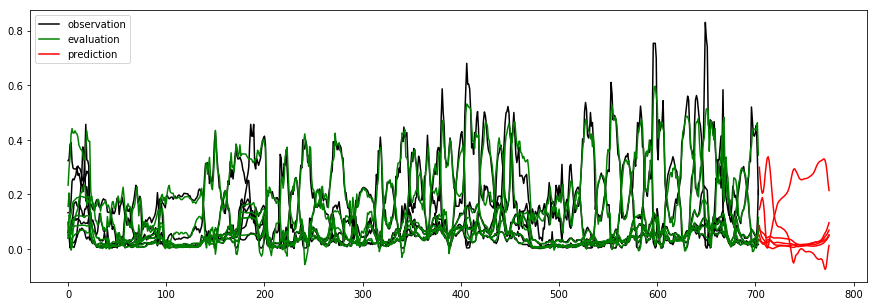

In [597]:
tf.logging.set_verbosity(tf.logging.INFO)
csv_file_name = path.join("inputData.csv")
reader = tf.contrib.timeseries.CSVReader(csv_file_name, skip_header_lines = True,
                                         column_names=((tf.contrib.timeseries.TrainEvalFeatures.TIMES,)
                                                       + (tf.contrib.timeseries.TrainEvalFeatures.VALUES,) * 6))
    
train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size=4, window_size=24)
estimator = ts_estimators.TimeSeriesRegressor(model=_LSTMModel(num_features=6, num_units=128),
                                              optimizer=tf.train.AdamOptimizer(0.001))

estimator.train(input_fn=train_input_fn, steps=1500)
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = estimator.evaluate(input_fn=evaluation_input_fn, steps=1)
# Predict starting after the evaluation
(predictions,) = tuple(estimator.predict(input_fn=tf.contrib.timeseries.predict_continuation_input_fn(evaluation, steps=72)))

observed_times = evaluation["times"][0]
observed = evaluation["observed"][0, :, :]
evaluated_times = evaluation["times"][0]
evaluated = evaluation["mean"][0]
predicted_times = predictions['times']
predicted = predictions["mean"]

plt.figure(figsize=(15, 5))
# plt.axvline(99, linestyle="dotted", linewidth=4, color='r')
observed_lines = plt.plot(observed_times, observed, label="observation", color="k")
evaluated_lines = plt.plot(evaluated_times, evaluated, label="evaluation", color="g")
predicted_lines = plt.plot(predicted_times, predicted, label="prediction", color="r")
plt.legend(handles=[observed_lines[0], evaluated_lines[0], predicted_lines[0]],loc="upper left")
# plt.savefig('predict_result.jpg')

In [598]:
result = pd.DataFrame(predicted[24:]).rename(columns={0:'PM25' ,1:'PM10', 2:'NO2' ,3:'CO' ,4:'O3' ,5:'SO2'}).drop(['NO2','CO','SO2'],axis = 1)

In [599]:
result.head()

,PM25,PM10,O3
0,0.021664,0.039304,0.189367
1,0.021272,0.038926,0.192327
2,0.020586,0.038430,0.196006
3,0.020162,0.037945,0.199975
4,0.019988,0.037513,0.204664


In [600]:
ans = pd.concat([result['PM25']*1000, result['PM10']*3000, result['O3']*500], axis = 1)

In [579]:
ans.describe()

,PM25,PM10,O3
count,48.000000,48.000000,48.000000
mean,76.638153,177.907761,107.451477
std,16.853052,20.895330,27.244753
min,42.779385,126.638351,55.565121
25%,67.115955,164.079330,88.311171
50%,81.762611,183.842476,109.638657
75%,90.294668,195.342064,130.027523
max,95.904472,201.608826,144.181305


In [601]:
ans.to_csv('yongdingmennei_aq_0502to0503.csv')

In [189]:
predicted[:]

array([[ 6.91577867e-02,  5.60863912e-02,  1.74585700e-01,
         4.05234061e-02,  1.44572258e-02,  1.26304114e-02],
       [ 6.10673204e-02,  5.04733622e-02,  1.56183675e-01,
         3.70545909e-02,  1.57751739e-02,  8.80208425e-03],
       [ 3.76482718e-02,  3.25530246e-02,  1.06986508e-01,
         2.67184563e-02,  5.87347075e-02,  3.25405039e-03],
       [ 2.36746110e-02,  1.73714533e-02,  7.64381886e-02,
         2.20693890e-02,  8.99234414e-02,  1.42324343e-03],
       [ 1.96975209e-02,  1.10067334e-02,  5.76916747e-02,
         2.18999889e-02,  1.12153873e-01,  3.08286771e-03],
       [ 2.12974735e-02,  1.06000490e-02,  5.25940731e-02,
         2.26369966e-02,  1.20477900e-01,  3.34429182e-03],
       [ 2.37995945e-02,  1.19832102e-02,  5.63135780e-02,
         2.37989742e-02,  1.20087609e-01,  3.39226611e-03],
       [ 2.72057652e-02,  1.35896243e-02,  6.42931610e-02,
         2.50286181e-02,  1.11230947e-01,  3.02131288e-03],
       [ 3.21015157e-02,  1.53205507e-02,  7.475